In [15]:
from sympy import *
from sympy.abc import x
c,t=symbols("c,t",positive=True)
dy=Symbol("dy")
y=Function('y')
y1=diff(y(x),x)
F=sqrt((1+y1**2)/(y(x)))
DE=Eq(simplify(F-y1*diff(F,y1)),1/sqrt(c))
sol=solve(DE,y1)[1].simplify()
display(DE)
display(sol)
Y=c*sin(t)**2
eq=(1/sol).subs(y(x),Y)
dy=diff(Y,t)
f=eq*dy
f=sqrt(simplify(f**2))
X=integrate(f,t).simplify()
display('Solution is x=',X,'y=',Y)

Eq(sqrt((Derivative(y(x), x)**2 + 1)/y(x))/(Derivative(y(x), x)**2 + 1), 1/sqrt(c))

sqrt(c/y(x) - 1)

'Solution is x='

c*(t - sin(2*t)/2)

'y='

c*sin(t)**2

T(cycloid) = 0.566
T(circle) = 0.580
T(parabola) = 0.571
T(linear) = 0.668


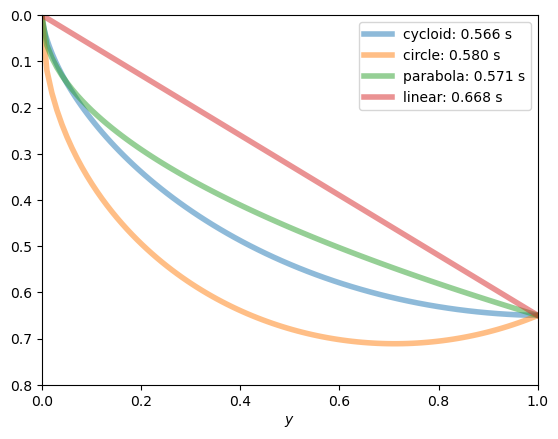

In [1]:
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Acceleration due to gravity (m.s-2); final position of bead (m).
g = 9.81
x2, y2 = 1, 0.65

def cycloid(x2, y2, N=100):
    """Return the path of Brachistochrone curve from (0,0) to (x2, y2).

    The Brachistochrone curve is the path down which a bead will fall without
    friction between two points in the least time (an arc of a cycloid).
    It is returned as an array of N values of (x,y) between (0,0) and (x2,y2).

    """

    # First find theta2 from (x2, y2) numerically (by Newton-Rapheson).
    def f(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(f, np.pi/2)

    # The radius of the circle generating the cycloid.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, N)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    # The time of travel
    T = theta2 * np.sqrt(R / g)
    print('T(cycloid) = {:.3f}'.format(T))
    return x, y, T

def linear(x2, y2, N=100):
    """Return the path of a straight line from (0,0) to (x2, y2)."""

    m = y2 / x2
    x = np.linspace(0, x2, N)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    print('T(linear) = {:.3f}'.format(T))
    return x, y, T

def func(x, f, fp):
    """The integrand of the time integral to be minimized for a path f(x)."""

    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))

def circle(x2, y2, N=100):
    """Return the path of a circular arc between (0,0) to (x2, y2).

    The circle used is the one with a vertical tangent at (0,0).

    """

    # Circle radius
    r = (x2**2 + y2**2)/2/x2

    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(circle) = {:.3f}'.format(T))
    return x, y, T

def parabola(x2, y2, N=100):
    """Return the path of a parabolic arc between (0,0) to (x2, y2).

    The parabola used is the one with a vertical tangent at (0,0).

    """

    c = (y2/x2)**2

    def f(x):
        return np.sqrt(c*x)
    def fp(x):
        return c/2/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(parabola) = {:.3f}'.format(T))
    return x, y, T

# Plot a figure comparing the four paths.
fig, ax = plt.subplots()

for curve in ('cycloid', 'circle', 'parabola', 'linear'):
    x, y, T = globals()[curve](x2, y2)
    ax.plot(x, y, lw=4, alpha=0.5, label='{}: {:.3f} s'.format(curve, T))
ax.legend()

ax.set_xlabel('$x$')
ax.set_xlabel('$y$')
ax.set_xlim(0, 1)
ax.set_ylim(0.8, 0)
plt.show()

In [141]:
from sympy import *
from sympy.abc import x
c,t=symbols("c,t",positive=True)
dy=Symbol("dy")
y=Function("y")
y1=diff(y(x),x)
F=sqrt((1+y1**2)/(y(x)))
DE=Eq(simplify(F-y1*diff(F,y1)),1/sqrt(c))
sol=solve(DE,y1)[1].simplify()
Y=c*sin(t)**2
eq=(1/sol).subs(y(x),Y)
dy=diff((c*sin(t)**2),t)
f=eq*dy
f=sqrt(simplify(f**2))
X=integrate(f,t).simplify()
display('Solution is x=',X,'y=',Y)

'Solution is x='

c*(t - sin(2*t)/2)

'y='

c*sin(t)**2